In [308]:
import torch
import torch.utils.data.dataset as dts
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [309]:
from sklearn.datasets import load_diabetes

In [310]:
diab = load_diabetes()

In [311]:
x = torch.from_numpy(diab.data)
y = torch.from_numpy(diab.target)

In [312]:
x[0]

tensor([ 0.0381,  0.0507,  0.0617,  0.0219, -0.0442, -0.0348, -0.0434, -0.0026,
         0.0199, -0.0176], dtype=torch.float64)

In [313]:
x = x.type(torch.float32)
y = y.type(torch.float32)

In [314]:
print(x.size(), y.size())

torch.Size([442, 10]) torch.Size([442])


In [315]:
y = y.view(-1, 1)

In [316]:
print(x.size(), y.size())

torch.Size([442, 10]) torch.Size([442, 1])


In [193]:
x_train, y_train, x_test, y_test = x[:400], y[:400], x[400:], y[400:]

In [194]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([400, 10]) torch.Size([400, 1]) torch.Size([42, 10]) torch.Size([42, 1])


In [195]:
# initialie the weights and bias
w = torch.randn((x.size()[1], 1), requires_grad=True)
b = torch.randn(y.size()[1], requires_grad=True)

In [196]:
print(w.shape, b.shape)

torch.Size([10, 1]) torch.Size([1])


In [197]:
def forward(x):
    return x@w + b

In [198]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [376]:
Loss = []
max_itr = 5000
lr = 0.03
for epoch in range(max_itr):
    
    #
    y_pred = forward(x_train)
    
    # calculate the loss
    loss = mse(y_train, y_pred)
    
    # backpropagate  loss
    loss.backward()
    
    Loss.append(loss.item())
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        w.grad.zero_()
        b.grad.zero_()

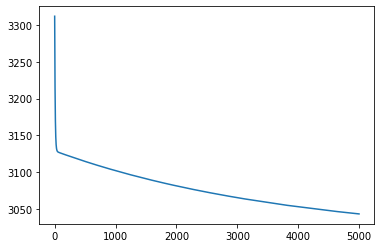

In [377]:
plt.plot(Loss)

In [380]:
forward(x_test)[-5:]

tensor([[189.3081],
        [119.2456],
        [132.7300],
        [198.8290],
        [ 55.8005]], grad_fn=<SliceBackward>)

In [381]:
y_test[-5:]

tensor([[178.],
        [104.],
        [132.],
        [220.],
        [ 57.]])

## MVR with Custom Dataset Loader

In [317]:
from torch.utils.data import Dataset, DataLoader

In [318]:
class Data(Dataset):
    
    def __init__(self):
        self.x, self.y = self.load_data()
        self.len = self.x.shape[0]
        
        
    def load_data(self):
        diab = load_diabetes()
        x = torch.from_numpy(diab.data)
        y = torch.from_numpy(diab.target)
        x = x.type(torch.float32)
        y = y.type(torch.float32)

        return x, y
    
     # Getter
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    # Return the length
    def __len__(self):
        return self.len

In [372]:
dataset = Data()

In [373]:
train_dl = DataLoader(dataset, batch_size=1, shuffle=True)

In [358]:
# class LR():
    
#     def __init__(self):
#         # initialie the weights and bias
#         self.w = torch.randn((x.size()[1], 1), requires_grad=True)
#         self.b = torch.randn(y.size()[1], requires_grad=True)
#         self.Loss = []
        
#     def forward(self, x):
#         return x@self.w + self.b
    
#     def mse(self, y_true, y_pred):
#         diff = y_true - y_pred
#         return torch.sum(diff * diff) / diff.numel()
    
#     def fit(self, train_dl, lr=0.1, epochs=500):
        
#         for epoch in range(epochs):
            
#             loss = 0
            
#             for x, y in train_dl:
                
#                 # predict the y for a batch 
#                 y_pred = self.forward(x)
                
#                 # compute the batch loss and append it into the epoch loss
#                 l = self.mse(y, y_pred)
#                 loss += l.item()
                
#                 # backpropagate the loss
#                 l.backward()
#                 self.w -= lr*self.w.grad
#                 self.b -= lr*self.b.grad

#                 self.w.grad.zero_()
#                 self.b.grad.zero_()
                
#             self.Loss.append(loss/len(train_dl))
#         return self.Loss
                
    
        
        

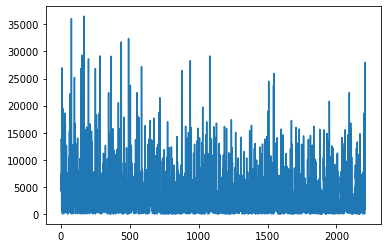

In [349]:
len(train_dl)

28